# Intro

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

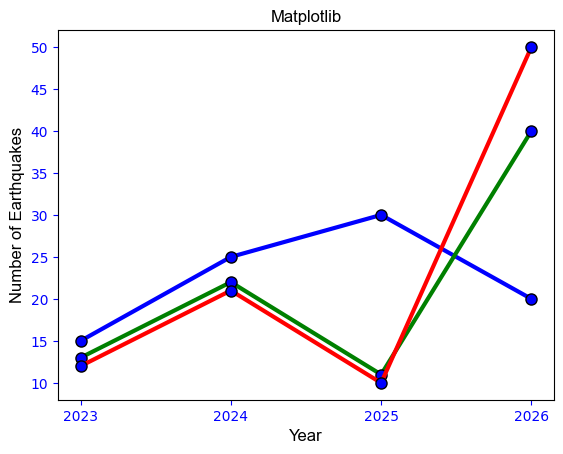

In [41]:
x = np.array([2023,2024,2025,2026])
y1 = np.array([15,25,30,20])
y2 = np.array([13,22,11,40])
y3 = np.array([12,21,10,50])

plt.title("Matplotlib",fontsize=12,family="arial")

plt.xlabel("Year",fontsize=12,family="arial")
plt.ylabel("Number of Earthquakes",fontsize=12,family="arial")


line_style = dict(marker='o',markersize=8,markerfacecolor='blue',markeredgecolor='black',linewidth=3)

plt.tick_params(axis="both",colors='blue')

plt.plot(x,y1,color='blue',**line_style)
plt.plot(x,y2,color='green',**line_style)
plt.plot(x,y3,color='red',**line_style)

plt.xticks(x)

plt.show()

# Grid

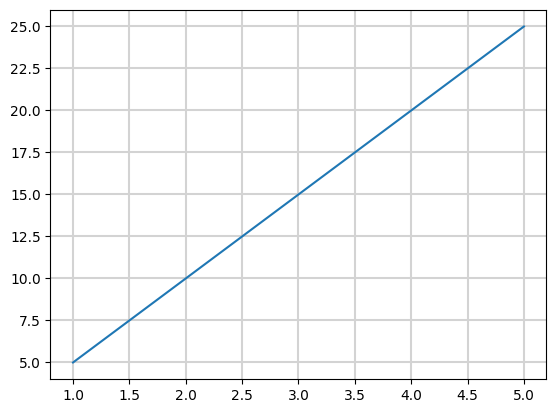

In [46]:
x = [1,2,3,4,5]
y = [5,10,15,20,25]

plt.grid(linewidth=1.5,color="lightgray")

plt.plot(x,y)
plt.show()

# Barchart

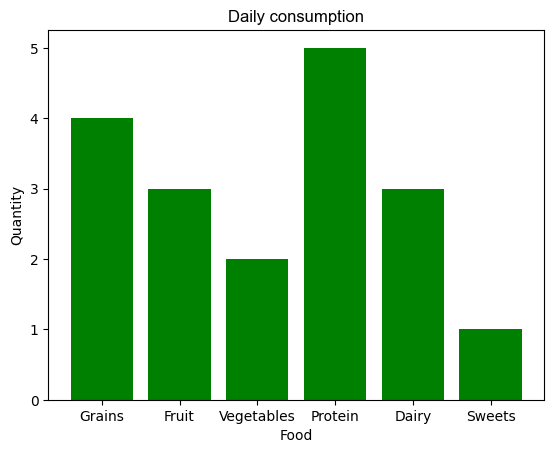

In [53]:
categories = ["Grains","Fruit","Vegetables","Protein","Dairy","Sweets"]
values = np.array([4,3,2,5,3,1])

plt.bar(categories,values,color="green")

plt.title("Daily consumption",fontsize=12,family="arial")
plt.xlabel("Food")
plt.ylabel("Quantity")

plt.show()



# Pie Charts

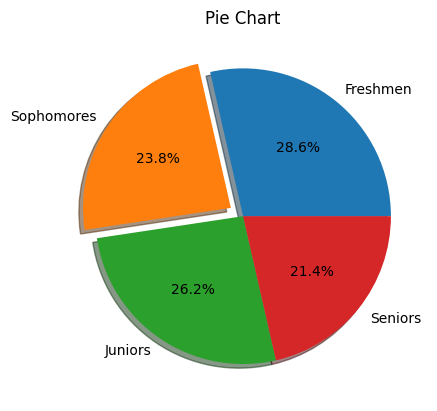

In [60]:
categories = ["Freshmen","Sophomores","Juniors","Seniors"]
values = np.array([300,250,275,225])

plt.title("Pie Chart")
plt.pie(values,labels=categories,autopct="%1.1f%%",explode=[0,0.1,0,0],shadow=True)
plt.show()
plt.show()



# Scatter graph

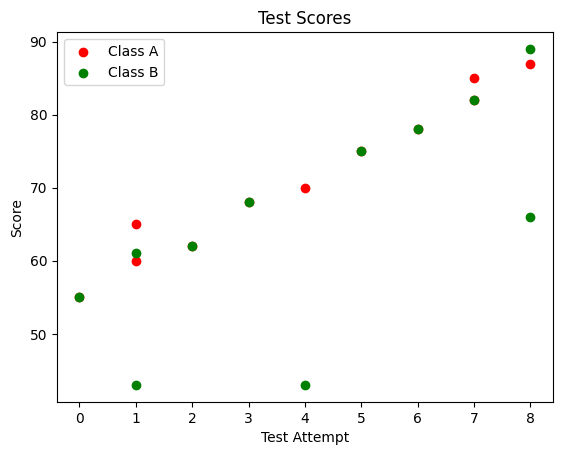

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,1,2,3,4,5,6,7,7,8])
y1 = np.array([55,60,65,62,68,70,75,78,82,85,87])

x2 = np.array([0,1,1,2,3,4,5,6,7,8,8])
y2 = np.array([55,43,61,62,68,43,75,78,82,89,66])

plt.scatter(x1, y1, color="red", label="Class A")
plt.scatter(x2, y2, color="green", label="Class B")

plt.title("Test Scores")
plt.xlabel("Test Attempt")
plt.ylabel("Score")
plt.legend()
plt.show()



# Histogram

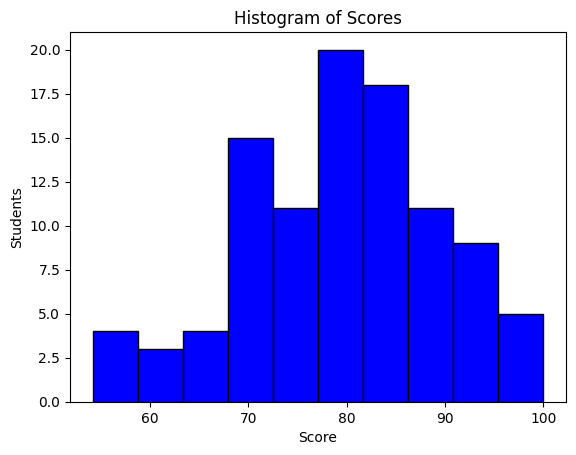

In [10]:
scores = np.random.normal(loc=80,scale=10,size=100)
scores = np.clip(scores,0,100)

plt.hist(scores,bins=10,color="blue",edgecolor="black")
plt.title("Histogram of Scores")
plt.xlabel("Score")
plt.ylabel("Students")
plt.show()

# Subplot

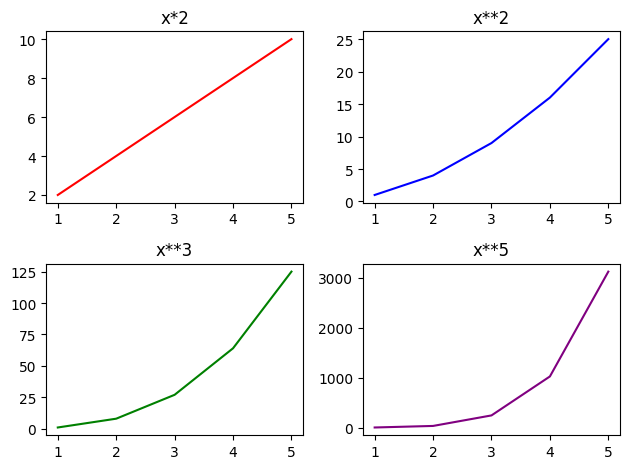

In [19]:
x =np.array([1,2,3,4,5])

figure,axes = plt.subplots(2,2)

axes[0,0].plot(x,x*2,color="red")
axes[0,0].set_title("x*2")

axes[0,1].plot(x,x**2,color="blue")
axes[0,1].set_title("x**2")


axes[1,0].plot(x,x**3,color="green")
axes[1,0].set_title("x**3")


axes[1,1].plot(x,x**5,color="purple")
axes[1,1].set_title("x**5")

plt.tight_layout()
plt.show()

# Exercise

In [20]:
import pandas as pd

In [22]:
df = pd.read_csv("./data.csv")

   No        Name  Type1   Type2  Height  Weight  Legendary
0   1   Bulbasaur  Grass  Poison     0.7     6.9          0
1   2     Ivysaur  Grass  Poison     1.0    13.0          0
2   3    Venusaur  Grass  Poison     2.0   100.0          0
3   4  Charmander   Fire     NaN     0.6     8.5          0
4   5  Charmeleon   Fire     NaN     1.1    19.0          0


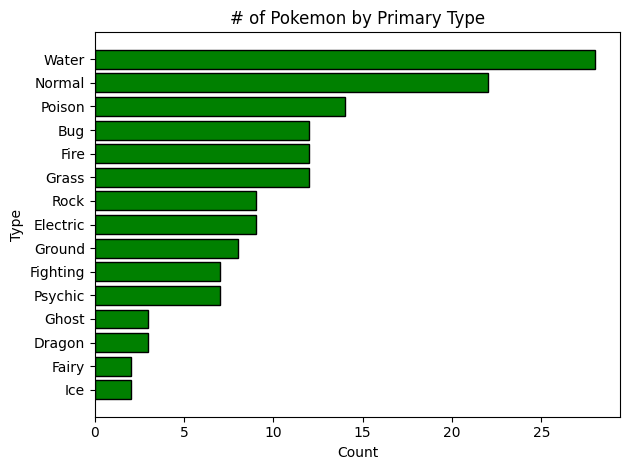

In [28]:
type_count = df['Type1'].value_counts(ascending=True)


plt.barh(type_count.index,type_count.values,color="green",edgecolor="black")

plt.title("# of Pokemon by Primary Type")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

# More exercises

# 1) Figure/Axes API deep dive

Prefer the **object-oriented** API for full control.
- `plt.subplots()` returns `(fig, ax)` (or array of axes) for structured plotting.
- `subplot_mosaic` gives named layouts.
- Use `constrained_layout=True` to avoid overlaps (or `fig.tight_layout()`).

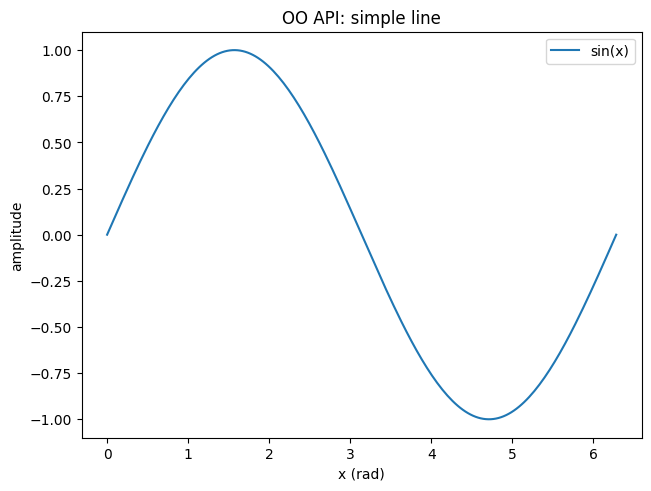

In [1]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y, label="sin(x)")
ax.set(title="OO API: simple line", xlabel="x (rad)", ylabel="amplitude")
ax.legend()
plt.show()


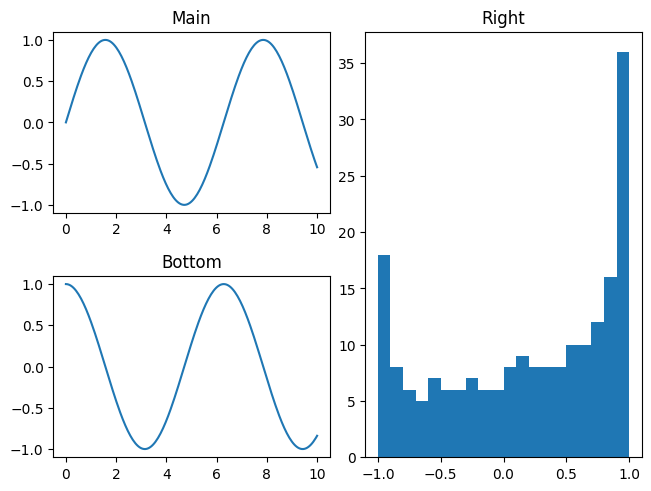

In [2]:

fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([
    ["main", "right"],
    ["bottom", "right"]
])
x = np.linspace(0, 10, 200)
axs["main"].plot(x, np.sin(x))
axs["main"].set_title("Main")
axs["right"].hist(np.sin(x), bins=20)
axs["right"].set_title("Right")
axs["bottom"].plot(x, np.cos(x))
axs["bottom"].set_title("Bottom")
plt.show()


# 2) Layout mastery: GridSpec, shared axes, twin & secondary axes

- `GridSpec` gives fine-grained control over rows/cols.
- `sharex/sharey` keeps axes aligned.
- `twinx()` adds a second y-axis; `secondary_x/yaxis` converts units (no manual math).

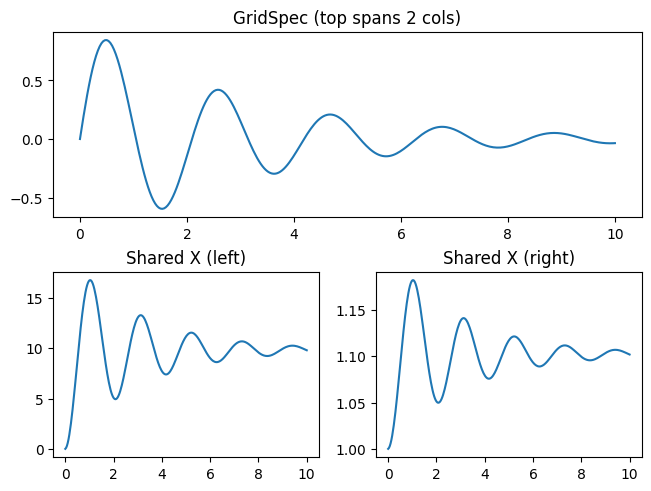

In [3]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

x = np.linspace(0, 10, 300)
y = np.exp(-x/3)*np.sin(3*x)

fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])        
ax2 = fig.add_subplot(gs[1, 0])        
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2)  

ax1.plot(x, y); ax1.set_title("GridSpec (top spans 2 cols)")
ax2.plot(x, np.cumsum(y)); ax2.set_title("Shared X (left)")
ax3.plot(x, np.cumprod(1 + y*0.01)); ax3.set_title("Shared X (right)")
plt.show()


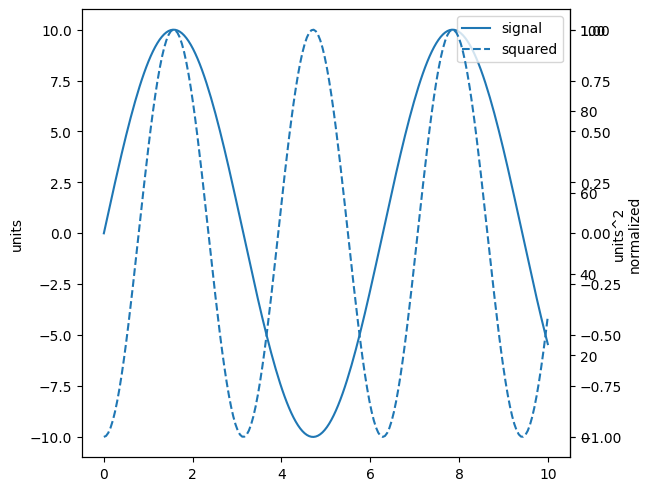

In [4]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x) * 10  
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y, label="signal")
ax.set_ylabel("units")

ax2 = ax.twinx()
ax2.plot(x, y**2, linestyle="--", label="squared")
ax2.set_ylabel("units^2")

def to_norm(val): 
    m = np.nanmax(y)
    return val/m if m != 0 else val
def from_norm(val):
    m = np.nanmax(y)
    return val*m if m != 0 else val

sec = ax.secondary_yaxis("right", functions=(to_norm, from_norm))
sec.set_ylabel("normalized")

lines = ax.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc="upper right")
plt.show()


# 3) Colormaps, normalization & colorbars

- Use `Normalize`, `LogNorm`, `TwoSlopeNorm` for meaningful color mapping.
- Always show a colorbar for quantitative images or 2D fields.

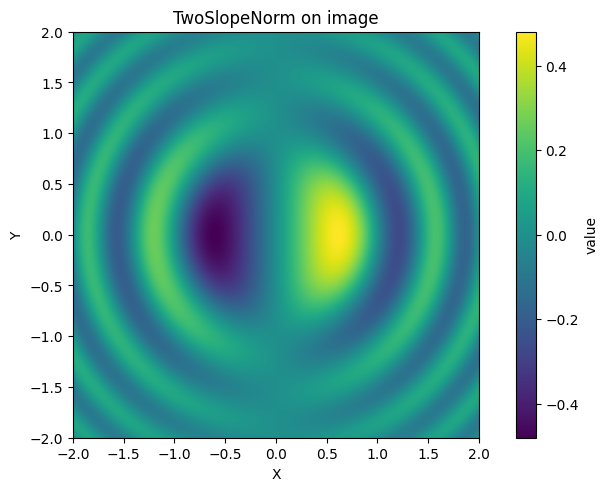

In [5]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm

x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = np.sinc(X**2 + Y**2) * (X)

fig, ax = plt.subplots(constrained_layout=True)
norm = TwoSlopeNorm(vmin=Z.min(), vcenter=0.0, vmax=Z.max())
im = ax.imshow(Z, origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], norm=norm)
ax.set(title="TwoSlopeNorm on image", xlabel="X", ylabel="Y")
fig.colorbar(im, ax=ax, label="value")
plt.show()


# 4) Annotations, arrows & transforms

- `ax.annotate` with `arrowprops` for callouts.
- Use data/axes/figure coordinates via `transform`.
- `ax.text` for labels that follow data or stay in corners.

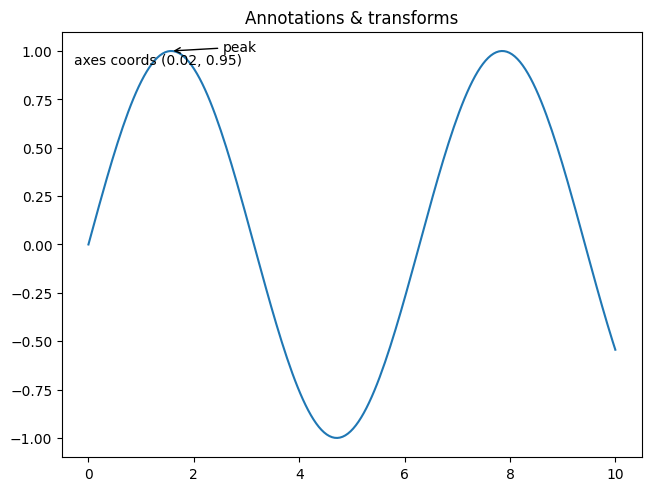

In [6]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y)
ax.set_title("Annotations & transforms")
peak_x = x[np.argmax(y)]
peak_y = y.max()
ax.annotate("peak", xy=(peak_x, peak_y), xytext=(peak_x+1, peak_y),
            arrowprops=dict(arrowstyle="->"))
ax.text(0.02, 0.95, "axes coords (0.02, 0.95)", transform=ax.transAxes, va="top")
plt.show()


# 5) Ticks, locators & formatters (including dates)

- Use `MaxNLocator`, `LogLocator`, `FuncFormatter` for custom ticks.
- Dates: `mdates` with `AutoDateLocator` & `ConciseDateFormatter`.
- Rotate tick labels for readability.

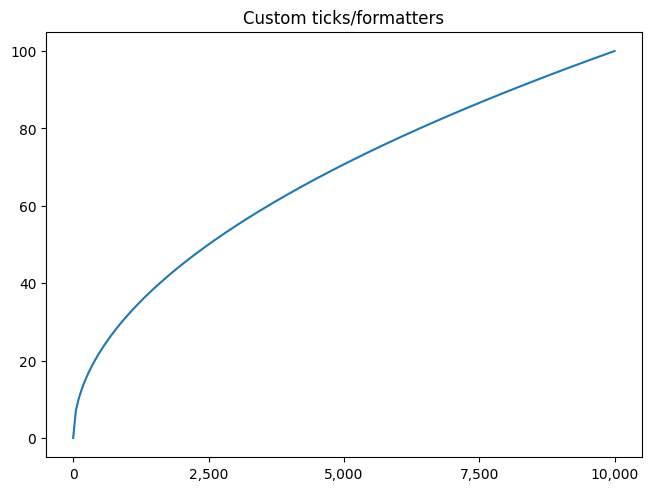

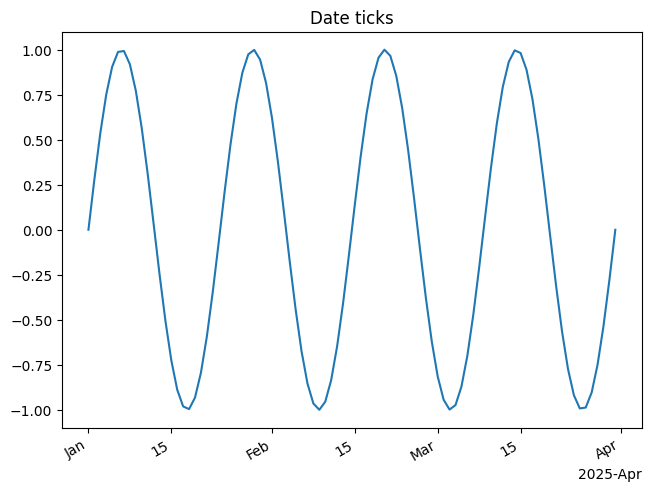

In [7]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates
import pandas as pd

x = np.linspace(0, 10000, 200)
y = np.sqrt(x)
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.set_title("Custom ticks/formatters")
plt.show()

dates = pd.date_range("2025-01-01", periods=90, freq="D")
vals = np.sin(np.linspace(0, 8*np.pi, len(dates)))
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(dates, vals)
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
fig.autofmt_xdate()
ax.set_title("Date ticks")
plt.show()


# 6) Error bars & confidence bands

- `ax.errorbar` for symmetric/asymmetric errors.
- `fill_between` for confidence intervals or highlight ranges.

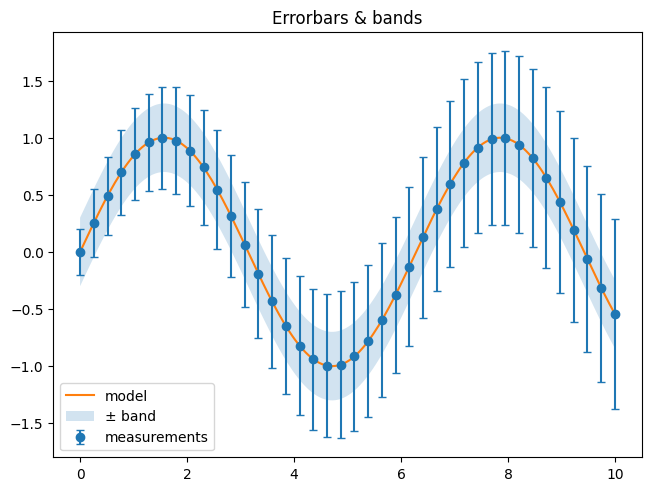

In [8]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 40)
y = np.sin(x)
err = 0.2 + 0.2*np.sqrt(x)

fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(x, y, yerr=err, fmt="o", capsize=3, label="measurements")
xf = np.linspace(0, 10, 200)
yf = np.sin(xf)
band = 0.3
ax.plot(xf, yf, label="model")
ax.fill_between(xf, yf-band, yf+band, alpha=0.2, label="± band")
ax.legend()
ax.set_title("Errorbars & bands")
plt.show()


# 7) Images & aspect control

- `imshow` arguments: `origin`, `extent`, `interpolation`, `aspect`.
- Use colorbars and document units via labels.

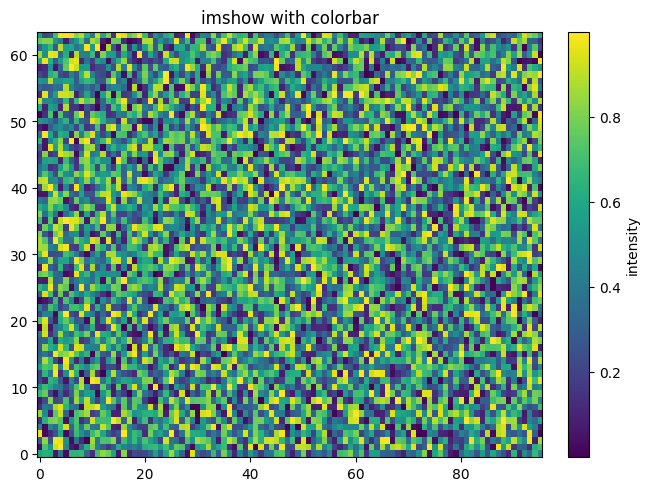

In [9]:

import matplotlib.pyplot as plt
import numpy as np

img = np.random.rand(64, 96)
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(img, origin="lower", aspect="auto")
fig.colorbar(im, ax=ax, label="intensity")
ax.set_title("imshow with colorbar")
plt.show()


# 8) Legends & custom artists

- Build legends from handles/labels to control content/order.
- Patch/Line2D artists for custom legend entries.

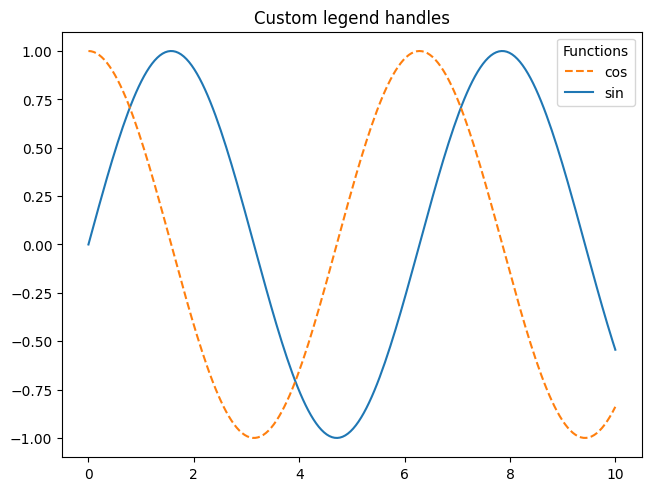

In [10]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

x = np.linspace(0, 10, 200)
fig, ax = plt.subplots(constrained_layout=True)
l1 = ax.plot(x, np.sin(x), label="sin")[0]
l2 = ax.plot(x, np.cos(x), label="cos", linestyle="--")[0]

handles = [l2, l1]
labels = [h.get_label() for h in handles]
ax.legend(handles, labels, title="Functions")
ax.set_title("Custom legend handles")
plt.show()


# 9) Styles, rcParams & color cycles

- Use built-in styles with care; reset as needed.
- `rcParams` sets defaults globally (font size, grids, figure size).
- `cycler` customizes linestyles/markers.

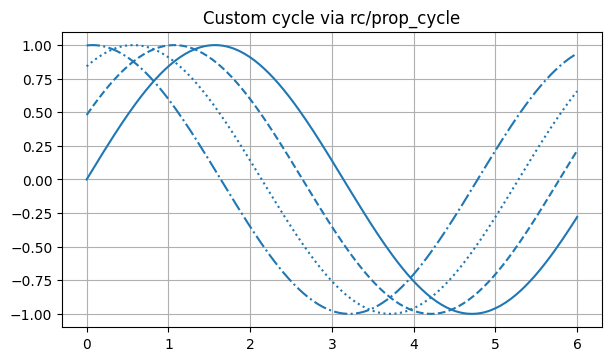

In [11]:

import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

mpl.rcParams.update({
    "figure.figsize": (6.0, 3.5),
    "axes.grid": True,
    "font.size": 10
})

x = np.linspace(0, 6, 200)
fig, ax = plt.subplots(constrained_layout=True)
ax.set_prop_cycle(cycler(linestyle=["-","--",":","-."]))
for k in range(4):
    ax.plot(x, np.sin(x + k/2))
ax.set_title("Custom cycle via rc/prop_cycle")
plt.show()


# 10) Performance & export

- Rasterize heavy scatters; save high-res with `dpi=300` and `bbox_inches='tight'`.
- Use **SVG/PDF** for vector; **PNG** for web.

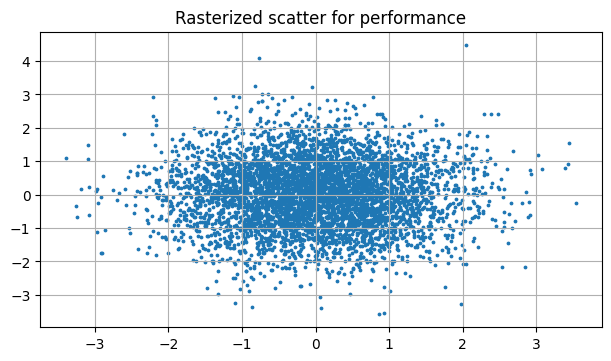

In [12]:

import matplotlib.pyplot as plt
import numpy as np

N = 5000
x = np.random.randn(N)
y = np.random.randn(N)

fig, ax = plt.subplots(constrained_layout=True)
pts = ax.scatter(x, y, s=3)
pts.set_rasterized(True)
ax.set_title("Rasterized scatter for performance")
# fig.savefig("scatter_highres.png", dpi=300, bbox_inches="tight")
plt.show()


# 11) 3D basics (mplot3d)

- Add `projection='3d'`.
- Surface & wireframe for 2D functions.

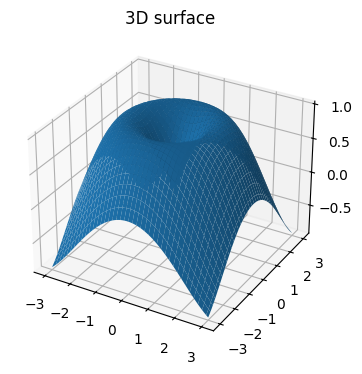

In [13]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)
ax.set_title("3D surface")
plt.show()


# 12) Simple animation (FuncAnimation)

Create small animations; save as GIF/MP4 if needed.

In [14]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

x = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set(xlim=(0, 2*np.pi), ylim=(-1.1, 1.1), title="Animation")

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    y = np.sin(x + frame/10)
    line.set_data(x, y)
    return (line,)

anim = FuncAnimation(fig, update, frames=60, init_func=init, blit=True)
plt.close(fig)
display(anim.to_jshtml())


'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

# 13) Events & pickers

- Connect callbacks with `fig.canvas.mpl_connect`.
- Enable picking on artists to inspect points.

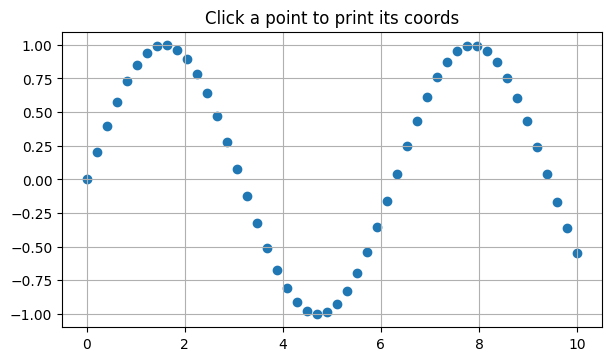

In [15]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 50)
y = np.sin(x)

fig, ax = plt.subplots(constrained_layout=True)
pts = ax.scatter(x, y, picker=True)
ax.set_title("Click a point to print its coords")

def on_pick(event):
    ind = event.ind[0]
    print("Picked:", x[ind], y[ind])

cid = fig.canvas.mpl_connect("pick_event", on_pick)
plt.show()
